## Python statistics essential training - 04_05_pvaluesandconfidence

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.vote.value_counts(normalize=True)

vote
Brown    0.511
Green    0.489
Name: proportion, dtype: float64

In [ ]:
#The null hypothesis based on vote proportions in the poll would be:
# that Green wins or ties the election

#Now to determine if the proportion of 0.511 is an extreme result if the null hypothesis is true


In [7]:
#Simulate a sample of 1000 voters
def sample(brown, n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown,'Brown','Green')})

In [10]:
# make df of the proportions of the votes
dist = pd.DataFrame({'Brown': [sample(0.50,1000).vote.value_counts(normalize=True)['Brown'] for i in range(10000)]})

<Axes: >

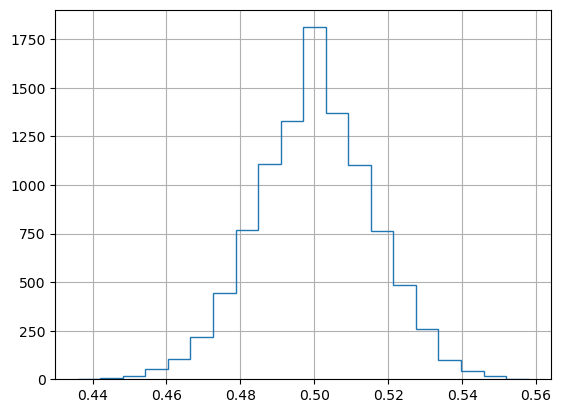

In [11]:
dist.Brown.hist(histtype='step',bins=20)

In [12]:
#see that 0.511 is not a very unlikely value

In [13]:
# Check the quantile for 0.511
100 - scipy.stats.percentileofscore(dist.Brown,0.511)

24.474999999999994

# Larger sample of voters
## Since Green seems to have majority votes (see prev exercises) set null hypothesis to:
### Brown winning or tying the election

In [14]:
largepoll = pd.read_csv('poll-larger.csv')

In [15]:
largepoll.vote.value_counts(normalize=True)

vote
Green    0.5181
Brown    0.4819
Name: proportion, dtype: float64

In [16]:
dist = pd.DataFrame({'Green': [sample(0.50,10000).vote.value_counts(normalize=True)['Green'] for i in range(1000)]})

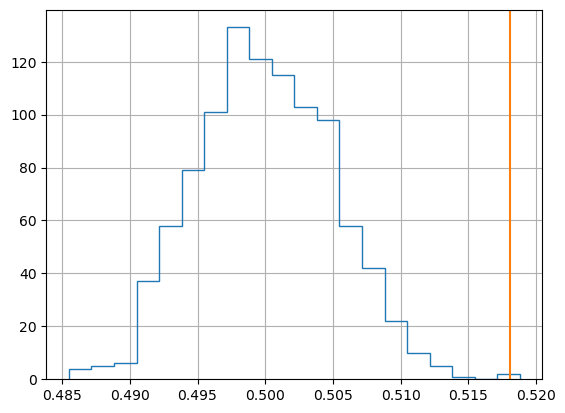

In [17]:
dist.Green.hist(histtype='step',bins=20)
pp.axvline(0.5181,c='C1')

In [18]:
# The proportion of 0.5181 votes to Green is an outlier & is strong evidence to reject the null hypothesis of Brown winning or tie the election